# Examples
#### Frederik Kelbel, Imperial College London

## Dependencies

In [1]:
from operators import div, Δ
from DGM import DGMSolver
import argparse
import matplotlib.pyplot as plt
import numpy as np

## Plotting

In [2]:
def plot_losses(losses, avg_over=10):
    plt.plot(np.convolve(losses, np.ones(avg_over), 'valid') / avg_over)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

## Model Configurations

In [3]:
MODEL_CONFIG = {
    "batch_size": 128, # minimum batch size is two because of split
    "hidden_dim": 256,
    "learning_rate": 1e-6
}

## Partial Differential Equations

### Declarations

In [4]:
INVISCID_BURGERS_CONFIG = {
    "x_dim": 1,
    "equation": lambda u, x, t: div(u, t) + u * div(u, x),
    "boundary_cond": lambda u, x, t: u*0,
    "boundary_func": lambda x: x,
    "init_datum": lambda u, x: x - u
}
VISCOUS_BURGERS_CONFIG = {
    "x_dim": 1,
    "equation": lambda u, x, t: div(u, t) + u * div(u, x) - 0.5 * Δ(u, x),
    "boundary_cond": lambda u, x, t: u,
    "boundary_func": lambda x: 1.0 if x > 0.0 else -1.0,
    "init_datum": lambda u, x: x - u
}

### Solutions for Reference

In [5]:
BURGERS_CONFIG_sol = lambda x, t: x / (1 + t)

## Experiments

### 1. Solving the Inviscid Burgers' Equation:

100%|██████████| 1000/1000 [00:03<00:00, 303.82 it/s]


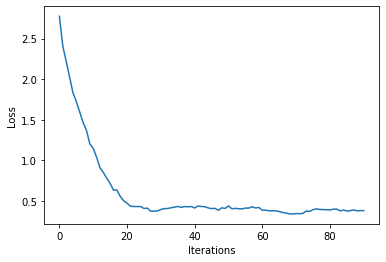

In [6]:
eq_1 = INVISCID_BURGERS_CONFIG
model_1 = MODEL_CONFIG
solver_1 = DGMSolver(model_1, eq_1)
losses_1 = list(solver_1.train(1000))
plot_losses(losses_1)

### 2. Solving the Viscous Burgers' Equation:

100%|██████████| 1000/1000 [00:04<00:00, 236.29 it/s]


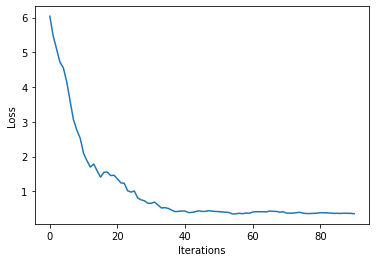

In [7]:
eq_2 = VISCOUS_BURGERS_CONFIG
model_2 = MODEL_CONFIG
solver_2 = DGMSolver(model_2, eq_2)
losses_2 = list(solver_2.train(1000))
plot_losses(losses_2)